In [21]:
import datetime
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt

plt.ion()

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14

warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('bike.csv')
df.set_index('lastCommunicationTime', inplace=True)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.head()

y = df.availableBikes
y.index.name = 'time'
#y = y.resample('5T').last()
y = y.fillna(method='ffill')
y.head()


ax = y.plot();
ax.set_ylabel('# Bikes');

y = y.values


def plot_multi_acf(data, lags, titles, ylim=None, partial=False):
    num_plots = len(lags)
    fig, ax = plt.subplots(len(lags), 1, figsize=(10, 3 * num_plots));
    if num_plots == 1:
        ax = [ax]
    acf_func = smt.graphics.plot_pacf if partial else smt.graphics.plot_acf
    for idx, (lag, title) in enumerate(zip(lags, titles)):
        fig = acf_func(data, lags=lag, ax=ax[idx], title=title);
        if ylim is not None:
            ax[idx].set_ylim(ylim);

    fig.tight_layout();

period_minutes = 5
samples_per_hour = int(60 / period_minutes)
samples_per_day = int(24 * samples_per_hour)
samples_per_week = int(7 * samples_per_day)

lags = [3 * samples_per_hour, samples_per_day, samples_per_week]
titles= ['Autocorrelation: 3-Hour Lag',
         'Autocorrelation: 1-Day Lag',
         'Autocorrelation: 1-Week Lag']

plot_multi_acf(y, lags, titles)

NameError: name 'warnings' is not defined

time
2020-02-22 10:39:58     5
2020-02-22 10:45:54    35
2020-02-22 10:46:01    25
2020-02-22 10:46:14     1
2020-02-22 10:46:26    21
Name: availableBikes, dtype: int64

ValueError: operands could not be broadcast together with shapes (2015,) (933,) (2015,) 

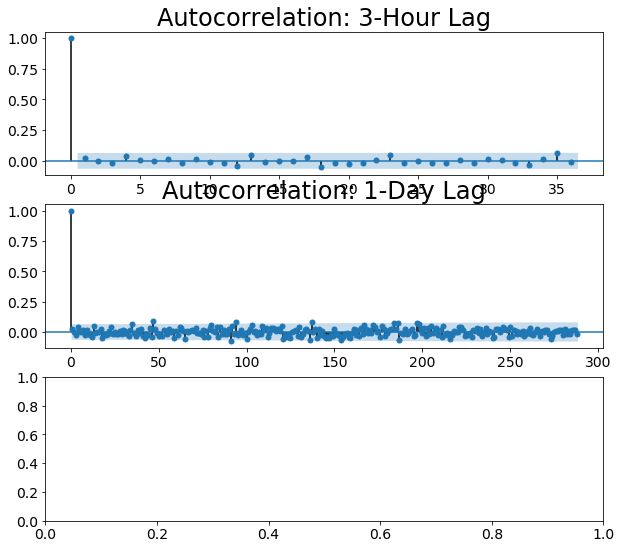